In [1]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'plantvillage-dataset' dataset.
Path to dataset files: /kaggle/input/plantvillage-dataset


In [3]:
print(os.listdir("/kaggle/input/plantvillage-dataset/plantvillage dataset"))


print(len(os.listdir("/kaggle/input/plantvillage-dataset/plantvillage dataset/segmented")))
print(os.listdir("/kaggle/input/plantvillage-dataset/plantvillage dataset/segmented")[:5])

print(len(os.listdir("/kaggle/input/plantvillage-dataset/plantvillage dataset/color")))
print(os.listdir("/kaggle/input/plantvillage-dataset/plantvillage dataset/color")[:5])

print(len(os.listdir("/kaggle/input/plantvillage-dataset/plantvillage dataset/grayscale")))
print(os.listdir("/kaggle/input/plantvillage-dataset/plantvillage dataset/grayscale")[:5])

['segmented', 'grayscale', 'color']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']


(256, 256, 3)


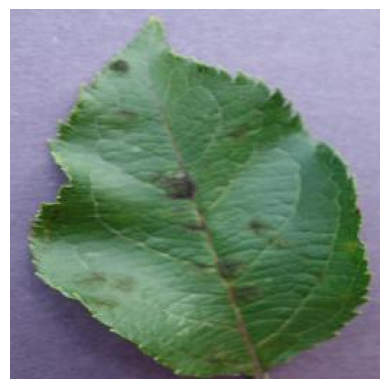

In [4]:
base_dir = '/kaggle/input/plantvillage-dataset/plantvillage dataset/color'


image_path = '/kaggle/input/plantvillage-dataset/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [5]:
image_path = '/kaggle/input/plantvillage-dataset/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


In [6]:
# Image Parameters
img_size = 224
batch_size = 32

In [7]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [8]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [9]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [10]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=35,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [13]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}


In [14]:
json.dump(class_indices, open('class_indices.json', 'w'))

class_indices


{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

img_size = 224
num_classes = len(class_indices)

base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size, img_size, 3)
)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 369s 260ms/step - accuracy: 0.4973 - loss: 1.8972 - val_accuracy: 0.8702 - val_loss: 0.4249
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 288s 212ms/step - accuracy: 0.8114 - loss: 0.6068 - val_accuracy: 0.9203 - val_loss: 0.2540
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 289s 213ms/step - accuracy: 0.8696 - loss: 0.4110 - val_accuracy: 0.9378 - val_loss: 0.2006
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 289s 212ms/step - accuracy: 0.8968 - loss: 0.3250 - val_accuracy: 0.9441 - val_loss: 0.1691
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 289s 213ms/step - accuracy: 0.9171 - loss: 0.2557 - val_accuracy: 0.9486 - val_loss: 0.1568
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 290s 213ms/step - accuracy: 0.9266 - loss: 0.2203 - val_accuracy: 0.9527 - val_loss: 0.1384
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 289s 213ms/step - accuracy: 0.9375 - loss: 0.1902 - val_accuracy: 0.9543 - val_loss: 0.1383
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 289s 213ms/step - ac

Evaluating model...
340/340 ━━━━━━━━━━━━━━━━━━━━ 58s 171ms/step - accuracy: 0.9592 - loss: 0.1314

Validation Accuracy: 95.89%
Validation Loss: 0.1292


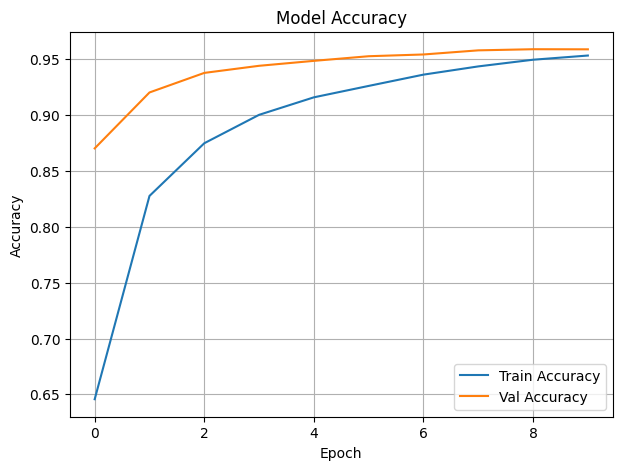

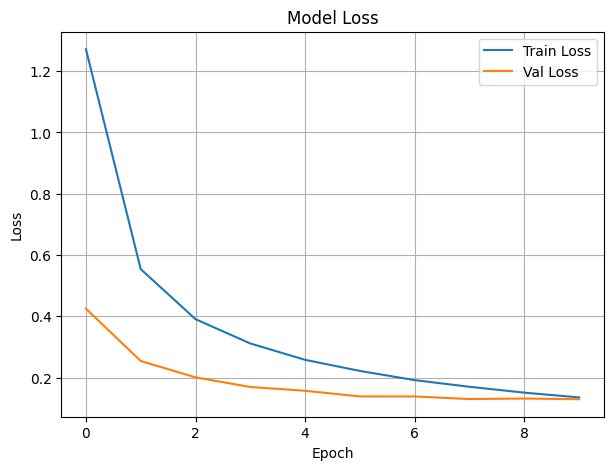

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step

Predicted Class: Apple___Black_rot
Confidence: 100.00%


In [17]:
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

# =====================
# Model Evaluation
# =====================

print("Evaluating model...")

val_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)

val_loss, val_accuracy = model.evaluate(
    validation_generator,
    steps=val_steps,
    verbose=1
)

print(f"\nValidation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

# =====================
# Plot Training Curves
# =====================

plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# =====================
# Image Preprocessing for VGG16
# =====================

def load_and_preprocess_image(image_path, target_size=(224,224)):
    img = Image.open(image_path).convert("RGB")
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# =====================
# Prediction Function (with confidence)
# =====================

def predict_image_class(model, image_path, class_indices):
    img = load_and_preprocess_image(image_path)
    preds = model.predict(img)
    pred_idx = np.argmax(preds, axis=1)[0]
    confidence = np.max(preds)
    return class_indices[pred_idx], confidence

# =====================
# Correct Class Mapping
# =====================

class_indices = {v:k for k, v in train_generator.class_indices.items()}

# =====================
# Test Example
# =====================

image_path = '/kaggle/input/plantvillage-dataset/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

predicted_class_name, confidence = predict_image_class(model, image_path, class_indices)

print(f"\nPredicted Class: {predicted_class_name}")
print(f"Confidence: {confidence * 100:.2f}%")


In [19]:
model.save_weights("leaf_vgg16_weights.weights.h5")

In [20]:
model.save("leaf_vgg16.keras")
